In [70]:
import pandas as pd

import numpy as np

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from yellowbrick.classifier import ROCAUC

In [72]:
# Load in the traing and test data
train = pd.read_csv ('train.csv', index_col='HHX')
test = pd.read_csv('test.csv', index_col='HHX')
train['PHQCAT_A'] = train['PHQCAT_A'].replace([2,3,4],-1)
test['PHQCAT_A'] = test['PHQCAT_A'].replace([2,3,4],-1)

In [73]:
# Picking out label and features
y_train = train.loc[:,'PHQCAT_A'].values
y_test = test.loc[:,'PHQCAT_A'].values
x_train = train.drop(['PHQCAT_A'], axis=1).values
x_test = test.drop(['PHQCAT_A'], axis=1).values

In [74]:
# Setting up the model
model = SVC(C=20,class_weight='balanced',decision_function_shape='ovr',probability=True)
model.fit(x_train, np.ravel(y_train))
y_predict = model.predict(x_test)

# Creating Print Results
string = f'The result of {model}:\n'
string += f'{classification_report(y_test, np.ravel(y_predict))}\n'
print(string)

The result of SVC(C=20, class_weight='balanced', probability=True):
              precision    recall  f1-score   support

          -1       0.37      0.24      0.29       907
           1       0.84      0.91      0.87      3947

    accuracy                           0.78      4854
   macro avg       0.60      0.57      0.58      4854
weighted avg       0.75      0.78      0.76      4854




In [54]:
scores = cross_val_score(model, x_train, y_train, cv=10, scoring=make_scorer(roc_auc_score,multi_class='ovr'))
scores

array([0.56731681, 0.56937927, 0.58672876, 0.57211391, 0.5541756 ,
       0.57417224, 0.55556771, 0.56284102, 0.56923206, 0.57398602])

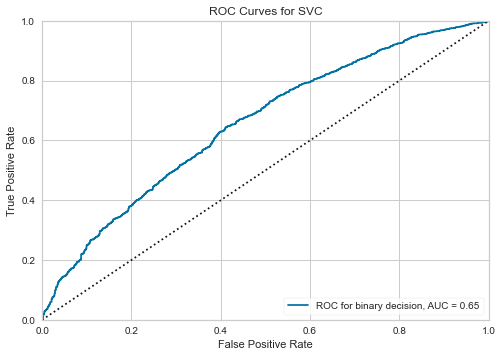

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
visualizer = ROCAUC(model, binary=True)
visualizer.fit(x_train, np.ravel(y_train))
visualizer.score(x_test,np.ravel(y_test))
visualizer.poof()